# Matplotlib for Publication - Exercises day 2

Here you'll be using a lot of the same data as yesterday, but with additional twists for more advanced concepts dealing with good practices for data representation.

**Make sure that either `exoplanets_5245_EarthUnits.csv` is saved to the same working directory as this notebook, or that the full path to the file is included in the `np.genfromtxt()` command.**

Refer to the day 1 exercises if you need a reminder of what the columns mean. A couple of helpful print statements are included with the data loading block below.

In [236]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
exos = np.genfromtxt('exoplanets_5245_EarthUnits.csv',delimiter=',',dtype=None, usecols=[0,3,4,5,6,7,8,10],
                     names=True, encoding='ascii')
#take a quick peak at the data so we know how to call it
print(exos.dtype.names)
print(exos[np.where(exos['name']=='55 Cancri e')])
print(exos[2000])

('name', 'planet_type', 'discovery_yr', 'mass_ME', 'radius_RE', 'orbital_radius_AU', 'orbital_period_yr', 'detection_method')
[('55 Cancri e', 'Super Earth', 2004, 7.99, 1.875, 0.01544, 0.0019165, 'Radial Velocity')]
('Kepler-1153 b', 'Super Earth', 2016, 3.64, 1.73, 0.0277, 0.00492813, 'Transit')


#### Exercise 1.
For this exercise, you will make Exercise 4 from the day 1 set more presentable. I expect this one exercise to take most of the exercise session because of all the parts.

Copy over the box-and-whisker and violin plot code from the day 1 exercises, and assign the lines with the `boxplot()` and `violinplot()` commands to variables so that you can adjust their properties. Again, the planet groups have been extracted by type for you.

Apply all of the following changes:
1. Set `dpi=150`, change `figsize` so that the figure fits on a page without going into the margins and so the subplots remain roughly square, and set the plots to share the axis perpendicular to the arrangement of the figures. It's up to you whether to arrange the subplots side-by-side or stacked vertically.
2. Increase the font size for everything to 14 (you'll fix the problem this introduces at the end).
3. Change the median line colors in all boxes to `'k'` (black). Refer to [the latter example set on this page in the official matplotlib documentation](https://matplotlib.org/stable/gallery/statistics/boxplot.html#sphx-glr-gallery-statistics-boxplot-py). 
4. Do the same thing to the median lines in the violin plots. This is easier than for box plots [once you learn from the documentation that the output of the `violinplot()` command is a dictionary.](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html#matplotlib.axes.Axes.violinplot) All you have to do is call `.set_edgecolor('dimgrey')` off the right key.
5. Follow [this example in the official matplotlib documentation](https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py) to give all of the boxes a different color. See [the Specifying Colors documentation](https://matplotlib.org/stable/users/explain/colors/colors.html#color-formats) or [the Named Colors example](https://matplotlib.org/stable/gallery/color/named_colors.html) for options. Don't forget to enable `patch_artist`!
6. Do the same for the violin plots. This works the same way as it does for box plots except the key is `'bodies'` instead of `'boxes'`, and you don't need to include `patch_artist=True`
7. Turn on the horizontal grid lines (see [this example](https://matplotlib.org/stable/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py) for a big hint) and y-axis ticks on the right-hand side.
8. Change `'Earth masses'` in the y-axis label to the symbol for Earth masses, $M_{\mathrm{\oplus}}$ ($\leftarrow$you are welcome to copy this mathtext right here), and adjust the orientation of the x-axis labels to fit. See [this `tick_params()` example](https://matplotlib.org/stable/gallery/ticks/fig_axes_customize_simple.html#sphx-glr-gallery-ticks-fig-axes-customize-simple-py) for how to rotate axis tick labels.
9. Download the image and check [the color-blindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) to make sure all of the colors are distinguishable from each other. If not, replace the problem color(s) and try again.

**Optional, if time:** use the `mpl.ticker.FixedLocator()` to force ticks and gridlines to be shown every decade instead of every 2 decades.

In [72]:
# Variables to load before running the code block below
ptypes, counts = np.unique(exos['planet_type'], return_counts=True)
giants = np.log10(exos['mass_ME'][np.where(exos['planet_type']=='Gas Giant')])
giants=giants[~np.isnan(giants)]
neptunes = np.log10(exos['mass_ME'][np.where(exos['planet_type']=='Neptune-like')])
supers = np.log10(exos['mass_ME'][np.where(exos['planet_type']=='Super Earth')])
terres = np.log10(exos['mass_ME'][np.where(exos['planet_type']=='Terrestrial')])

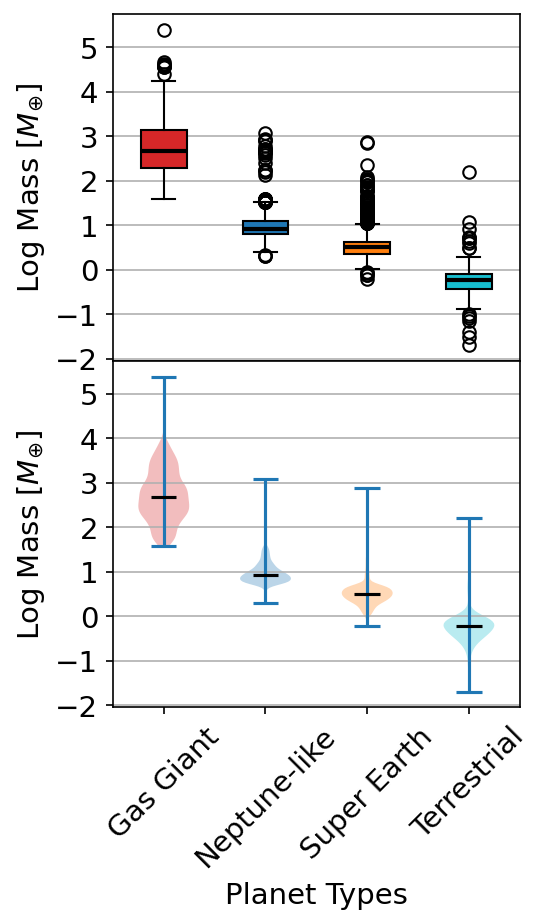

In [142]:
# instantiate fig, ax:
fig,axes = plt.subplots(nrows=2, dpi=150, figsize=(3.5,6), sharex=True)
# use rcParams to increase fontsize to 14 (you'll have to import matplotlib):
import matplotlib as mpl
mpl.rcParams['font.size']=14
#remove gap between figures
fig.subplots_adjust(hspace=0)

# create a medianprops dict to pass to boxplot() (or just do it in the boxplot command since it's short):
medianprops = dict(linewidth=2, color='k')
# make a list of distinct colors the same length as ptypes:
colors = ['tab:red','tab:blue','tab:orange', 'tab:cyan']

# make the box plot:
boxes = axes[0].boxplot([giants, neptunes, supers, terres],
                        medianprops=medianprops, patch_artist=True)
# set box colors:
for b, c in zip(boxes['boxes'], colors):
    b.set_facecolor(c)

# make the violin plot:
viols = axes[1].violinplot([giants, neptunes, supers, terres], showmedians=True)
# set violin body colors:
for v, c in zip(viols['bodies'], colors):
    v.set_facecolor(c)
#set violin median line color:
viols['cmedians'].set_edgecolor("k")

# Label axes for just this plot, and rotate x-axis tick labels
axes[1].set_xticks([1,2,3,4],labels=ptypes)
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].set_xlabel("Planet Types")
# use loop to assign axes properties that are the same for both plots
for ax in axes:
    ax.set_ylabel(r"Log Mass [$M_{\mathrm{\oplus}}$]")
    ax.grid(True,axis='y', which='both')
    # optional fix to locators
    ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(range(-2,6)))
# show the plot
plt.show()

#### Exercise 2.
The errorbar plot from day 1 exercise 2 ignored the fact that mass of the outermost planet, Kepler-11 g (the last entry in each array), is an upper limit. The error margins used instead were scaled from the uncertainty in radius.

Redo the planet mass and orbital radius errorbar plot with limits where appropriate. You will have to input the appropriate arrow length into the `yerr` array and assign `uplims` accordingly. Use [the errorbar() documention](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html#matplotlib.axes.Axes.errorbar) to help you.

Additionally, turn on axis ticks all the way around ([see tick_params docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params)), give the error bars caps (recommend 2-3-point caps), and insert the correct symbol for Earth masses (same as previous exercise).

This should be a quick one!

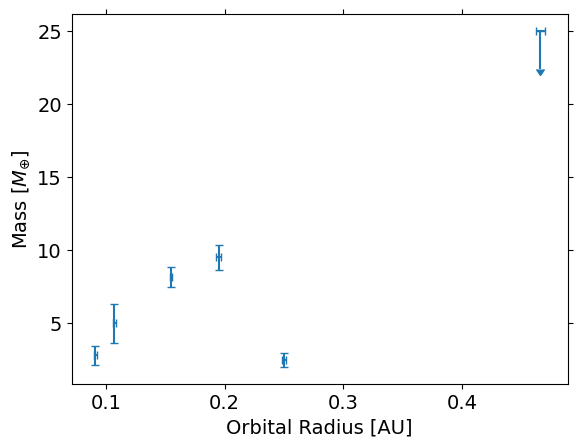

In [165]:
# Kepler-g is the last entry in each array
orb_rad_au = [0.091, 0.107, 0.155, 0.195, 0.250, 0.466]
orb_rad_errs = [0.001, 0.001, 0.001, 0.002, 0.002, 0.004]
mass_me = [2.78, 5.0, 8.13, 9.48, 2.43, 25]
mass_errs = [[0.66, 1.35, 0.66, 0.88, 0.45, 2.6],[0.64, 1.3, 0.67, 0.86, 0.49, 0]]

# create a boolean/integer uplims array:
uplims= np.zeros(len(mass_me))
uplims[-1] = 1
## instantiate fig, ax:
fig,ax = plt.subplots()
# plot errorbar plot with limits and caps
ax.errorbar(orb_rad_au, mass_me, xerr=orb_rad_errs, yerr=mass_errs, 
            uplims=uplims, ls='None', capsize=3)
# label axes:
ax.set_xlabel('Orbital Radius [AU]')
ax.set_ylabel('Mass [$M_{\mathrm{\oplus}}$]')
# turn on ticks all the way around:
ax.tick_params(axis='both',which='both', top=True, right=True)
# show the plot
plt.show()

#### Exercise 3.

Here we'll revisit day 1 exercise 3-B and modify it to highlight a few multi-planet systems. Copy the code over from the yesterday's exercise 3-B. Replace the hexbin with a loglog scatter plot. Use black points and set the transparency (`alpha`) to something in the 0.1-0.3 range. Turn on axis ticks all the way around.

Now we'll add the Solar System, HD 40307, Kepler-90, 55 Cancri, and TRAPPIST-1 as brightly-colored large markers on top. Select a unique marker for each, and plot each with `loglog()`. An iterator expression has been set up for you for the systems apart from Sol. For this number of data sets, the default color cycle is fine, but you may need to adjust the marker size (`'ms'`), and you should give each marker a thin (0.5 points) black outline. For a reference on marker parameters to tune and how, visit [the `plot()` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) (which `loglog()` is a wrapper for) and scroll down to the section of "Other parameters" where the kwargs start with "m".

Position the legend where it doesn't overlap the data.

In [232]:
# Provide this data again.
solsys = {'name': np.array(['Mercury','Venus','Earth','Mars',
                            'Jupiter','Saturn','Uranus','Neptune','Pluto']),
         'mass_ME': np.array([0.0553,0.815,1.0,0.107,
                              317.8,95.2,14.5,17.1, 0.0022]),
         'orbital_period_yr': np.array([0.241,0.615,1.0,1.88,
                                        11.9,29.4,83.7,163.7, 247.9])}

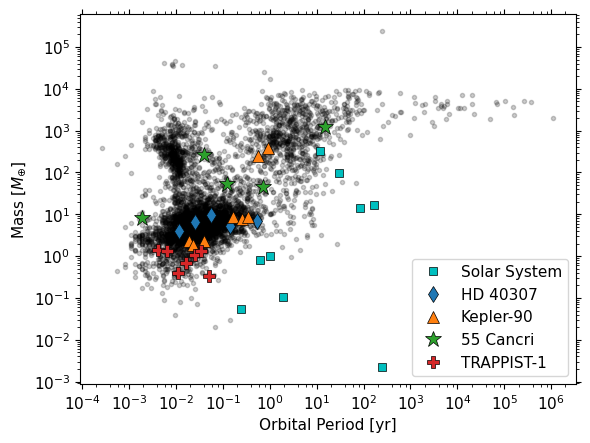

In [252]:
# make list of markers to iterate over (Remember that the Solar System is separate)
mks = ['d','^','*','P']

# instantiate fig, ax:
fig,ax = plt.subplots()
# plot loglog() plot (don't forget transparency!)
p = ax.loglog(exos['orbital_period_yr'][~np.isnan(exos['mass_ME'])],
              exos['mass_ME'][~np.isnan(exos['mass_ME'])], 'k.', alpha=0.2)

# label axes:
ax.set_xlabel('Orbital Period [yr]')
ax.set_ylabel('Mass [$M_{\mathrm{\oplus}}$]')
# plot the solar system data on top (might want to outline points in black):
ax.loglog(solsys['orbital_period_yr'], solsys['mass_ME'],'cs', label='Solar System', mec='k', mew=0.5)
# over-plot the other systems in a loop. (Fill in the blanks)
for k,s in enumerate(['HD 40307','Kepler-90','55 Cancri','TRAPPIST-1']):
    inds = np.where(np.array(list(map(lambda s: s[:-2], exos['name']))) == s)
    ax.loglog(exos['orbital_period_yr'][inds],exos['mass_ME'][inds], marker=mks[k], label=s,
              ls='none', mec='k', mew=0.5, ms=12 if mks[k]=='*' else 8)
# add a legend:
ax.legend(loc='lower right')

# Fix the x-axis:
# import matplotlib.ticker
from matplotlib import ticker
# set major locator
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=99))
# set minor locator
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.2,0.4,0.6,0.8), numticks=99))
# turn off minor tick labels
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
# turn on ticks all the way around
ax.tick_params(axis='both',which='both',top=True,right=True)
# show the plot:
plt.show()

#### Exercise 4.
Here you'll make a very efficient plot of the orbital period sensitivities of each detection method. (When you're done, imagine how big of a collection of pie charts you'd need to do the same thing!) We'll split the data into 6 upper-bound-inclusive half-open intervals by orbital period and label them as follows:

1. $\leq$1 day ($\leq$0.002738 yr) - "Hours"
2. 1-31 days (0.002738-0.08487 yr) - "Days"
3. 31-365.25 days (0.08487-1 yr) - "Months"
4. 1-10 years - "Years"
5. 10-100 years - "Decades"
6. $>$100 years - "Centuries +"
    
Dont't forget to execute the block below!

In [262]:
# Setup:
methds = sorted(set(exos['detection_method']))

tbins = np.array([0, 1/365.25, 31/365.25, 1., 10., 100., np.nanmax(exos['orbital_period_yr'])])
tbin_lbls = ['Hours','Days','Months','Years','Decades','Centuries +']
fpm = np.zeros((len(methds),len(tbin_lbls)))
# computing fractions (will be converted to percentages in plotting process
for i in range(1,len(tbins)):
    inds = np.where(np.logical_and(exos['orbital_period_yr'] > tbins[i-1],
                                   exos['orbital_period_yr'] <= tbins[i]))
    for j,m in enumerate(methds):
        mtot = len(np.where(exos['detection_method']==m)[0])
        ppb = len(np.where(exos['detection_method'][inds]==m)[0])
        if mtot > 0:
            fpm[j,i-1] = ppb/mtot
for i,row in enumerate(fpm):
    print(methds[i],': ', row,'\n')

Astrometry :  [0. 0. 1. 0. 0. 0.] 

Direct Imaging :  [0.         0.         0.03333333 0.01666667 0.11666667 0.83333333] 

Disk Kinematics :  [0. 0. 0. 0. 0. 1.] 

Eclipse Timing Variations :  [0.         0.         0.11764706 0.47058824 0.41176471 0.        ] 

Gravitational Microlensing :  [0.         0.00649351 0.03246753 0.82467532 0.13636364 0.        ] 

Orbital Brightness Modulation :  [0.33333333 0.66666667 0.         0.         0.         0.        ] 

Pulsar Timing :  [0.28571429 0.14285714 0.28571429 0.         0.28571429 0.        ] 

Pulsation Timing Variations :  [0. 0. 0. 1. 0. 0.] 

Radial Velocity :  [0.00097466 0.26413255 0.24463938 0.38693957 0.10038986 0.00292398] 

Transit :  [0.0278834  0.80659062 0.15969582 0.00583016 0.         0.        ] 

Transit Timing Variations :  [0.    0.625 0.25  0.125 0.    0.   ] 



Now, **taking guidance from [this Matplotlib demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py)** (you do not have to define the plot as a separate function), plot a horizontally stacked bar chart showing the *precentages*, by time bracket, of exoplanets detected with each method. Use a different colormap than the demo. As with the previous prompts, I've provided the arrays so you can focus on the plotting. 

To help this exercise fit in the time allotted, some of the code is provided. You just have to fill in the BLANKs.

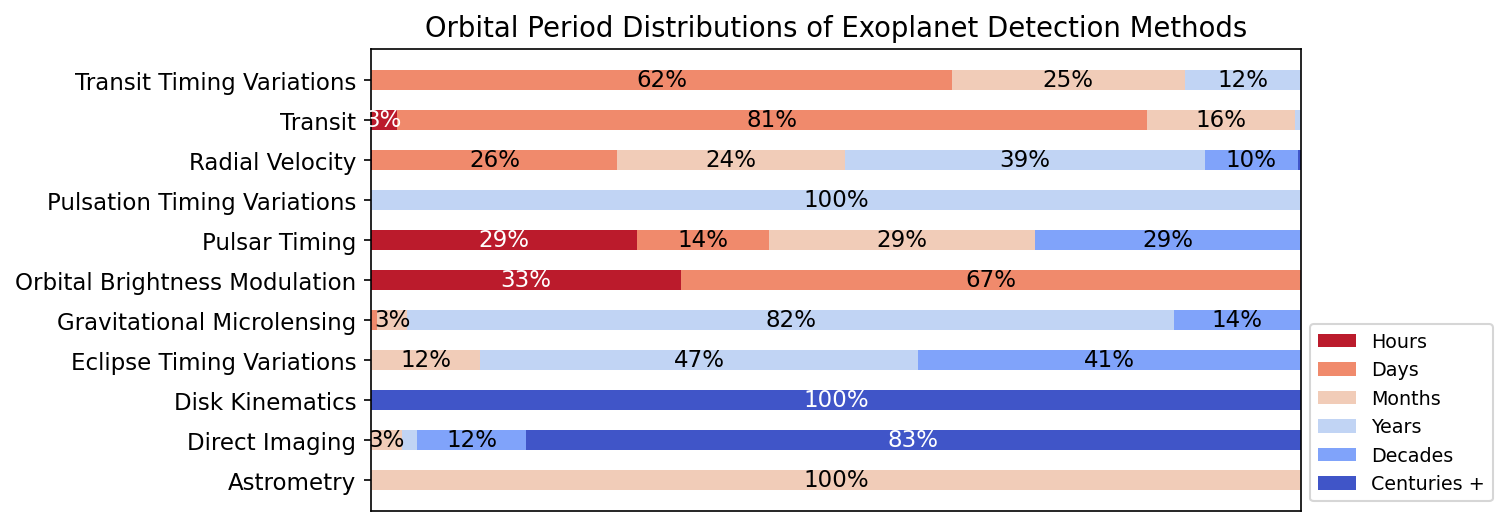

In [284]:
mpl.rcParams['font.size']=11
# instantiate fig, ax with appropriate fig size (recommend 2:1 width:height)
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
# turn off unhelpful x-axis
ax.xaxis.set_visible(False)
# set x-axis limits
ax.set_xlim(0, 1)
# compute color bins (choose your colormap)
tbin_colors = plt.colormaps['coolwarm_r'](np.linspace(0.02, 0.98, len(tbin_lbls)))
# cumsum array looks like [bin0, bin0+bin1, bin0+bin1+bin2, ..., 1] for each method
fpm_csum = fpm.cumsum(axis=1)
# cumsum needed to stack bars
for i, (colname, color) in enumerate(zip(tbin_lbls, tbin_colors)):
    widths = fpm[:, i]
    starts = fpm_csum[:,i] - widths
    rects = ax.barh(methds, widths, left=starts, height=0.5,
                    label=colname, color=color)
    #only print percentages >2% (too small otherwise)
    blabels = len(methds)*['']
    for j,v in enumerate(rects.datavalues):
        if v*100 > 2.: 
            blabels[j] = '{:.0%}'.format(v)
    # change label text color to white if fill color is too dark 
    r, g, b, _ = color
    text_color = 'white' if (r * g * b) < 0.2 else 'k'
    # label the bars
    ax.bar_label(rects, labels=blabels, label_type='center', color=text_color)
# add a legend
ax.legend(bbox_to_anchor=(1, 0), loc='lower left', fontsize='small')
ax.set_title('Orbital Period Distributions of Exoplanet Detection Methods')
# show the plot
plt.show()